In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
dat4 = pd.read_csv("advertising.csv")
dat4

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
dat4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


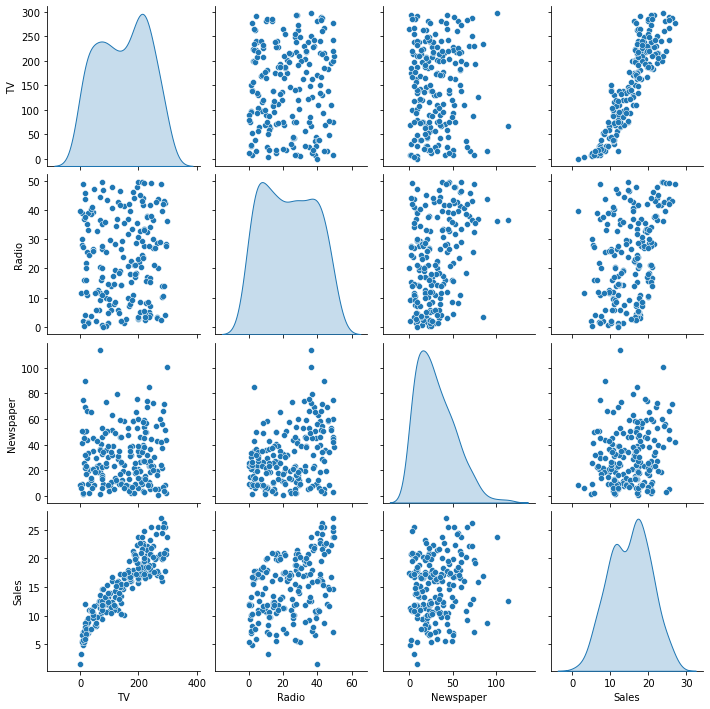

In [4]:
sns.pairplot(data=dat4, diag_kind = "kde")

In [5]:
import scipy.stats as stats

In [6]:
print(stats.pearsonr(dat4.Sales, dat4.TV))
print(stats.pearsonr(dat4.Sales, dat4.Radio))
print(stats.pearsonr(dat4.Sales, dat4.Newspaper))

(0.9012079133023309, 7.927911625320818e-74)
(0.3496310970076692, 3.882892364494171e-07)
(0.15796002615492633, 0.025487444306997908)


In [7]:
# Kết luận: Có thể dự đoán doanh thu (Sales) dựa trên chi phí quảng cáo trên TV
# Từ đó, ta cần tìm phương trình dự đoán doanh thu chi phí

In [8]:
# Hồi quy

In [9]:
# Tách bộ dữ liệu đang có thành 2 bộ để máy học và kiểm tra
learn = dat4.loc[:150, :] # Dữ liệu để máy học (huấn luyện)
test = dat4.loc[151:, :] # Dữ liệu để kiểm tra

In [16]:
# Cách khác để tách bộ dữ liệu
import sklearn.model_selection as model_selection
learn2, test2 = model_selection.train_test_split(dat4, test_size = 0.25)

In [17]:
learn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 90 to 78
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         150 non-null    float64
 1   Radio      150 non-null    float64
 2   Newspaper  150 non-null    float64
 3   Sales      150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [18]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 146 to 184
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         50 non-null     float64
 1   Radio      50 non-null     float64
 2   Newspaper  50 non-null     float64
 3   Sales      50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [19]:
learn2

,TV,Radio,Newspaper,Sales
90,134.3,4.9,9.3,14.0
152,197.6,23.3,14.2,16.6
4,180.8,10.8,58.4,17.9
131,265.2,2.9,43.0,17.7
132,8.4,27.2,2.1,5.7
...,...,...,...,...
88,88.3,25.5,73.4,12.9
199,232.1,8.6,8.7,18.4
134,36.9,38.6,65.6,10.8
46,89.7,9.9,35.7,10.6


In [20]:
test2

,TV,Radio,Newspaper,Sales
146,240.1,7.3,8.7,18.2
34,95.7,1.4,7.4,11.9
111,241.7,38.0,23.2,21.8
7,120.2,19.6,11.6,13.2
125,87.2,11.8,25.9,10.6
99,135.2,41.7,45.9,17.2
175,276.9,48.9,41.8,27.0
56,7.3,28.1,41.4,5.5
158,11.7,36.9,45.2,7.3
121,18.8,21.7,50.4,7.0


In [21]:
# QUÁ TRÌNH HỌC
import sklearn.linear_model as lm
reg2 = lm.LinearRegression()
X = np.asarray(learn2.loc[:, "TV"])
Y = np.asarray(learn2.loc[:, "Sales"])
reg2.fit(X.reshape(-1, 1), Y) # reshape chuyển từ vector ngang sang vector dọc

LinearRegression()

In [25]:
# Tính thủ công
Y_ = reg2.intercept_ + reg2.coef_*X
# Tính theo thư viện
# Y_ = reg2.predict(X.reshape(-1, 1))
Y_

array([14.38137732, 17.8969453 , 16.96390356, 21.65132753,  7.3891181 ,
       11.16571561, 11.37676077, 13.36502828, 15.1033739 ,  7.40022574,
        7.91673099, 17.06387231, 20.15179616, 16.27522989, 16.50293651,
       17.19161017, 21.52358967, 19.58530654, 15.23666558,  7.87785425,
       10.76584058, 19.54087598, 16.11972294, 19.601968  , 15.61987915,
       13.64271927,  8.00003828,  7.96116154, 15.99198508, 10.38262701,
       19.94630483,  9.69950716, 11.16571561, 16.43629067, 12.49863238,
       10.6880871 , 14.10924014, 13.75934949, 11.68222086, 14.65906831,
       16.00309272, 23.38411933, 14.58131483,  9.04415642, 23.22861237,
       14.77014471, 18.30792797,  7.35579518, 15.33663433, 23.18973563,
       10.043844  , 14.71460651, 21.43472855, 23.0120134 , 11.11573123,
        8.24440636,  8.44989769, 22.29001681, 16.68065874, 14.65351449,
        7.65570145,  8.01114592,  9.89389086, 12.62637024,  8.31660602,
       17.19161017, 13.02069145, 19.05769365, 12.3375716 , 20.24

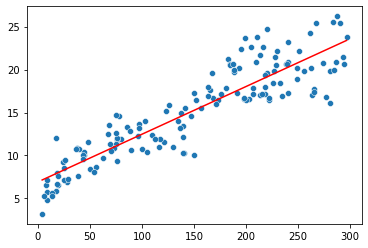

In [26]:
sns.scatterplot(x = X, y = Y)
sns.lineplot(x = X, y = Y_, color = "r");
plt.show()

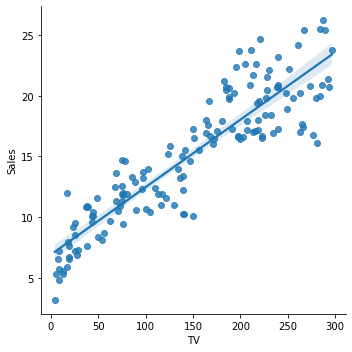

In [27]:
sns.lmplot(data = learn2, x = "TV", y = "Sales")

In [30]:
# Sử dụng bộ dữ liệu test để test kết quả vừa tính ra
# Tính toán điểm r2score, so sánh giữa dữ liệu dự đoán và dữ liệu thực

In [32]:
import sklearn.metrics as metrics
y_pred = reg2.predict(np.array(test2.TV).reshape(-1, 1))
metrics.r2_score(test2.Sales, y_pred)

0.8078938488013935

In [33]:
# Nếu kết quả ra 1 thì được nhất, càng cao càng tốt, thường là trên 90%
# => Kết quả tương đối chuẩn